**Clustering**

**Problem Statement**



Perform clustering for the crime data and identify the number of clusters            formed and draw inferences. Refer to crime_data.csv dataset.

CRISP-ML(Q) process model describes six phases:

Business and Data Understanding
Data Preparation
Model Building
Model Evaluation
Deployment
Monitoring and Maintenance

Objective(s): Maximize the 

Constraints: Minimize the 

In [1]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.1 MB/s eta 0:00:00


In [2]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [4]:
#import the data
df=pd.read_csv('/content/crime_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
'''
EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
1st Moment Business Decision (Measures of Central Tendency)

1) Mean

2) Median

3) Mode
'''

'\nEXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS\n1st Moment Business Decision (Measures of Central Tendency)\n\n1) Mean\n\n2) Median\n\n3) Mode\n'

In [9]:
print("Mean\n")
print(df.mean())
print("\nMedian\n")
print(df.median())
print("\nMode\n")
print(df.mode())

Mean

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Median

Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

Mode

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama     2.1    120.0      66.0  14.9
1           Alaska     2.2      NaN      80.0  16.3
2          Arizona     2.6      NaN       NaN   NaN
3         Arkansas     6.0      NaN       NaN   NaN
4       California     9.0      NaN       NaN   NaN
5         Colorado    13.2      NaN       NaN   NaN
6      Connecticut    15.4      NaN       NaN   NaN
7         Delaware     NaN      NaN       NaN   NaN
8          Florida     NaN      NaN       NaN   NaN
9          Georgia     NaN      NaN       NaN   NaN
10          Hawaii     NaN      NaN       NaN   NaN
11           Idaho     NaN      NaN       NaN   NaN
12        Illinois     NaN      NaN       NaN   NaN
13         Indiana     NaN      NaN       NaN   NaN
14          

<ipython-input-9-d18283fdce2b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
<ipython-input-9-d18283fdce2b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


In [10]:
"""
2nd Moment Business Decision (Measures of Dispersion)

1) Variance

2) Standard deviation

3) Range (maximum - minimum)
"""

'\n2nd Moment Business Decision (Measures of Dispersion)\n\n1) Variance\n\n2) Standard deviation\n\n3) Range (maximum - minimum)\n'

In [11]:
print("\n Variance \n")
print(df.var())
print("\n Standard Deviation\n")
print(df.std())


 Variance 

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

 Standard Deviation

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64


<ipython-input-11-7060b471bb3d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())
<ipython-input-11-7060b471bb3d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [12]:
"""
3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution
"""

'\n3rd Business Moment Decision (Skewness)\n\nMeasure of asymmetry in the data distribution\n'

In [13]:
print('Skewness\n')
df.skew()

Skewness



<ipython-input-13-6e4831380b96>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [14]:
"""
4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data
"""

'\n4th Business Moment Decision (Kurtosis)\n\nMeasure of peakedness - represents the overall spread in the data\n'

In [15]:
print("Kurtosis\n")
df.kurt()

Kurtosis



<ipython-input-15-183966664bef>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [16]:
"""
Cleaning Unwanted columns

"""

'\nCleaning Unwanted columns\n\n'

In [17]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [19]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [21]:
"""
Handling duplicates:
"""

'\nHandling duplicates:\n'

In [22]:
dup=df.duplicated()

In [23]:
sum(dup)

0

In [24]:
"""
Missing Value Analysis
"""

'\nMissing Value Analysis\n'

In [25]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [26]:
"""
From above observation there is no null value in dataset
"""

'\nFrom above observation there is no null value in dataset\n'

In [27]:
"""
Outliers Analysis
"""

'\nOutliers Analysis\n'

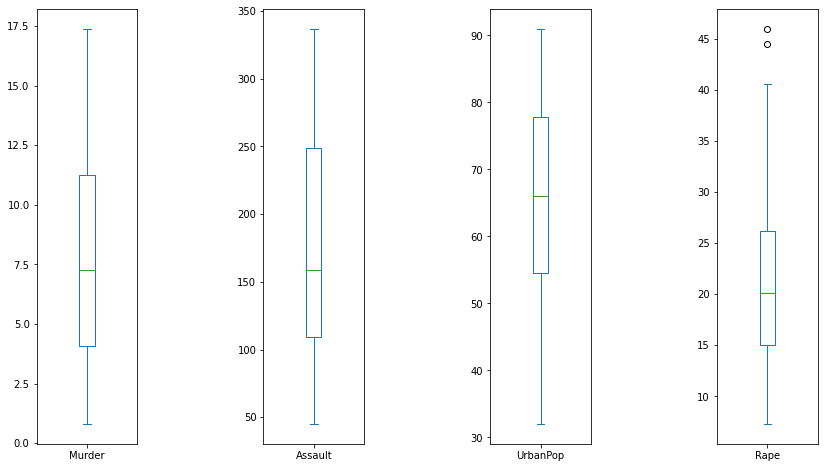

In [28]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (14, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  

In [40]:
#Outlier treatment
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Rape'])

df = winsor.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

In [42]:
#Zero and near zero variance
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          83.182041
dtype: float64

In [43]:
#Graphical representation
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


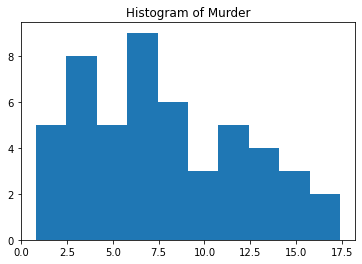

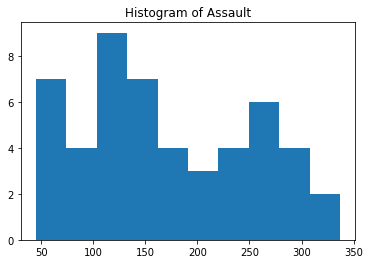

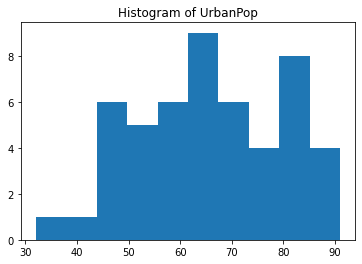

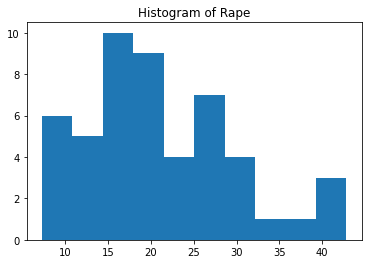

In [45]:
# Histogram describes the spread of data

for i in df.columns:
  plt.hist(x = df[i])
  plt.title("Histogram of " + str(i))
  plt.show()

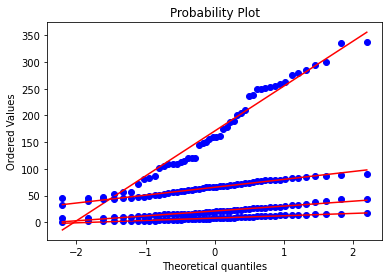

In [46]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
for i in df.columns:
  stats.probplot(df[i], dist = "norm", plot = pylab)

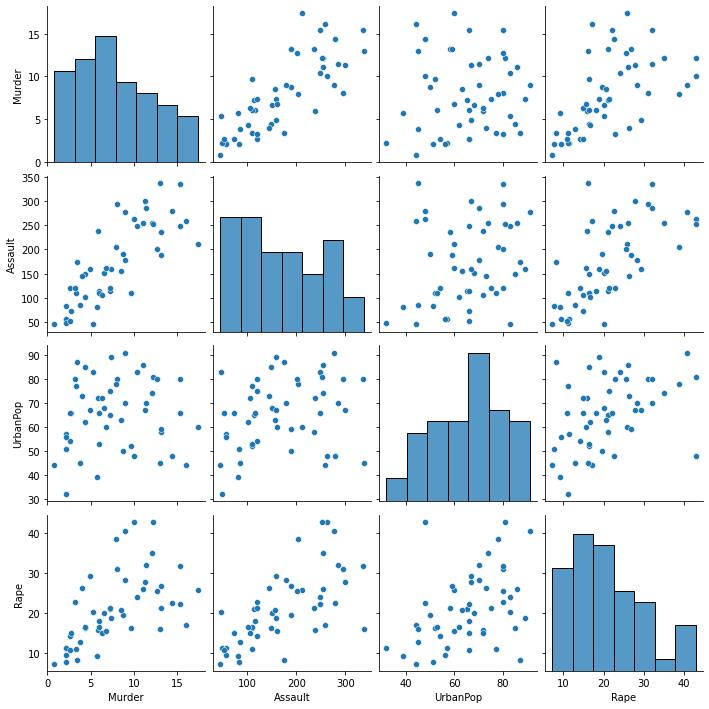

In [47]:
sns.pairplot(df)   # Use numerical variables for scatter plots

In [48]:
#Normalization
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [49]:
df = norm_func(df)

In [50]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
'''
CLUSTERING MODEL BUILDING
Hierarchical Clustering - Agglomerative Clustering
'''

In [51]:
# Libraries for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 


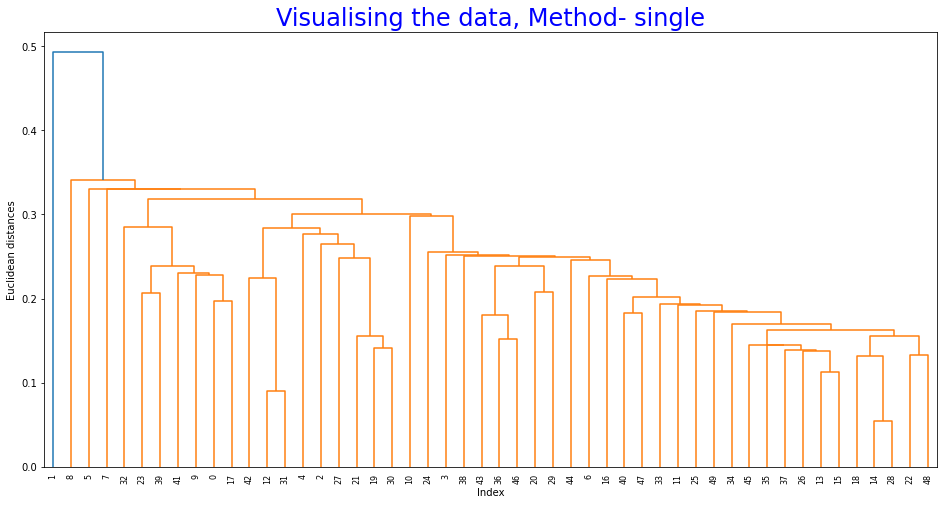

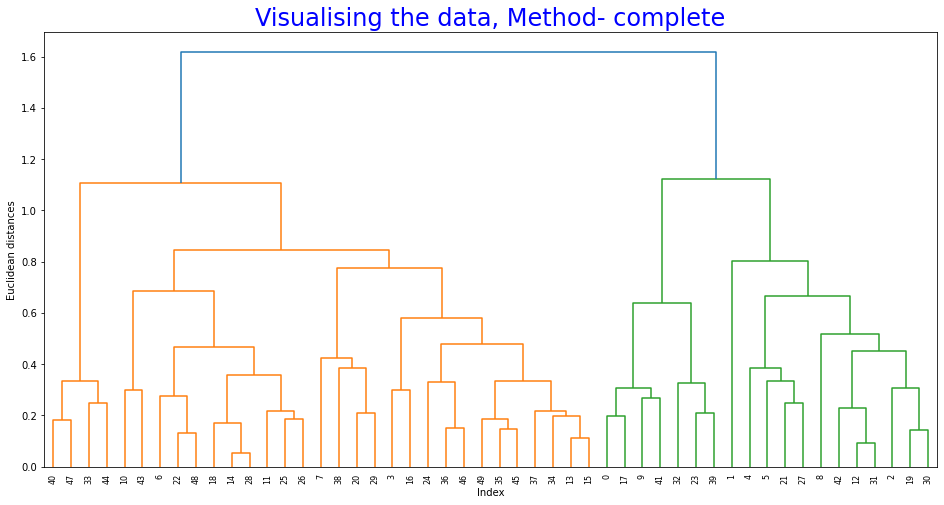

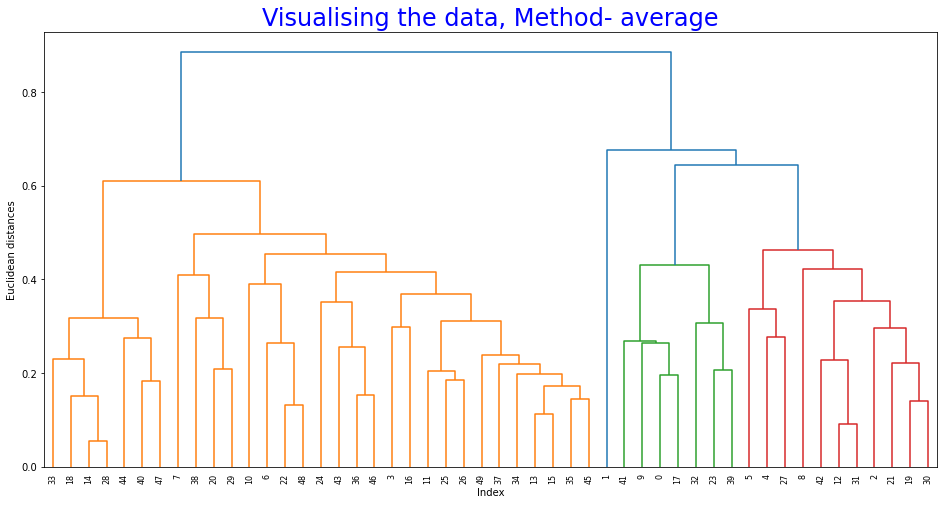

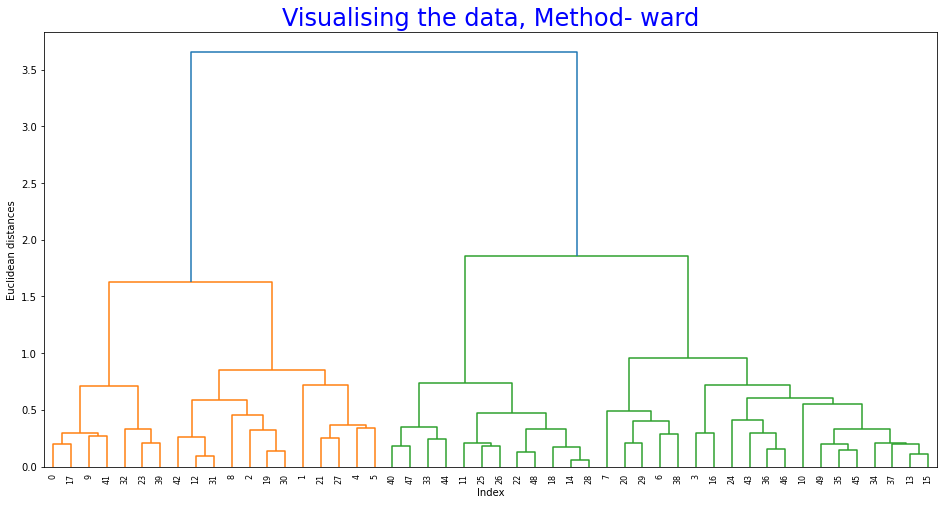

In [52]:
for methods in ['single','complete','average','ward']: 
  plt.figure(figsize =(16, 8)) 
  dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
  plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
  tree_plot=dendrogram(linkage(df, method =methods,optimal_ordering=False))
  plt.xlabel('Index')
  plt.ylabel('Euclidean distances')
  plt.show()

In [53]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df)
        silhouette_score1 = silhouette_score(df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4211268756375124
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4211268756375124
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4211268756375124
For n_clusters = 2 The average silhouette_score with linkage- single : 0.20413439572986747

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.32088332388502805
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.38018892118639636
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34734385958756314
For n_clusters = 3 The average silhouette_score with linkage- single : 0.13948841249992394

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3376138780280742
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.2857543995055805
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3681904340601792


In [54]:

hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc1 = hc1.fit_predict(df)
y_hc1

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [55]:

hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc2 = hc2.fit_predict(df)
y_hc2

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [57]:

hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hc3 = hc3.fit_predict(df)
y_hc3

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [58]:
hc2.labels_ 

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [59]:
cluster_labels = pd.Series(hc2.labels_)

In [60]:
# Add Cluster labels to orignal Dataset
df['cluster'] = cluster_labels
df.head(20)

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.391274,0
1,0.554217,0.746575,0.271186,1.000000,0
2,0.439759,0.852740,0.813559,0.667136,0
3,0.481928,0.496575,0.305085,0.343420,1
4,0.493976,0.791096,1.000000,0.937368,0
5,0.427711,0.544521,0.779661,0.883885,0
6,0.150602,0.222603,0.762712,0.106967,1
7,0.307229,0.660959,0.677966,0.239268,1
8,0.879518,0.993151,0.813559,0.692470,0
9,1.000000,0.568493,0.474576,0.520760,0


In [61]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.391274,0
32,0.734940,1.000000,0.220339,0.247713,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.275862,0
21,0.680723,0.719178,0.711864,0.782548,0
19,0.632530,0.873288,0.593220,0.577058,0
17,0.879518,0.698630,0.576271,0.419423,0
39,0.819277,0.801370,0.271186,0.427868,0
31,0.620482,0.715753,0.915254,0.529205,0
41,0.746988,0.489726,0.457627,0.551724,0


In [62]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.391274,0
32,0.734940,1.000000,0.220339,0.247713,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.275862,0
21,0.680723,0.719178,0.711864,0.782548,0
19,0.632530,0.873288,0.593220,0.577058,0
17,0.879518,0.698630,0.576271,0.419423,0
39,0.819277,0.801370,0.271186,0.427868,0
31,0.620482,0.715753,0.915254,0.529205,0
41,0.746988,0.489726,0.457627,0.551724,0


In [63]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Murder,Assault,UrbanPop,Rape,cluster
33,0.000000,0.000000,0.203390,0.000000,1
34,0.391566,0.256849,0.728814,0.396904,1
35,0.349398,0.363014,0.610169,0.357495,1
47,0.295181,0.123288,0.118644,0.056298,1
44,0.084337,0.010274,0.000000,0.109782,1
43,0.144578,0.256849,0.813559,0.439127,1
37,0.331325,0.208904,0.677966,0.213934,1
38,0.156627,0.441781,0.932203,0.028149,1
46,0.192771,0.342466,0.694915,0.532020,1
45,0.463855,0.380137,0.525424,0.377199,1


In [64]:
cluster1.to_csv('Crime_Data_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'/content'